# Google Trends

Google Trends é uma ferramenta do Google que mostra os mais populares termos buscados em um passado recente.

## Relatório de comparação de tendências

In [20]:
import math
from pickletools import uint8
from pytrends.request import TrendReq
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Markdown, display
def plotComparison(dataFrame:DataFrame, cols:uint8, showValues=False, Incerteza=False, ylin=[]):
    plt.figure(figsize=(20,5))
    Patch = []
    if (len(ylin)>0):
        plt.axes().set_ylim(ylin)
    for col in dataFrame.columns[0:cols]:
        color = 'red' if col == dataFrame.columns[0] else 'blue' if col == dataFrame.columns[1] else 'orange'
        Patch.append(mpatches.Patch(color=color, label=col))
        if Incerteza:
            for i in range(len(dataFrame[col])):
                plt.plot(dataFrame[col][i:i+2], label=col, color=color, linewidth=dataFrame['Incerteza'][i]*2)
        else:
            plt.plot(dataFrame[col], label=col, color=color)
    plt.legend(handles=Patch)
    if showValues:
        for index, row in dataFrame.iterrows():
            if index.minute == 0 and index.hour == 0 and index.second == 0 and index.microsecond == 0:
                for col in dataFrame.columns[0:cols]:
                    plt.text(index, row[col], "{:.1f}".format(row[col]))
                


# Palavras-chave
kw_list = ['lula', 'bolsonaro', 'lula bolsonaro']
conn = TrendReq(hl='pt-BR', tz=360,  requests_args={'verify':False}) # Conexão com o Google Trends
req = conn.get_historical_interest(kw_list, year_start=2022, month_start=10, day_start=3, hour_start=0, year_end=2022, month_end=10, day_end=30, hour_end=0, geo='BR', gprop='') 


C:\Users\10086519\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\10086519\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\10086519\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warn

The request failed: Google returned a response with code 400.


### Dados Lidos do Google Trends

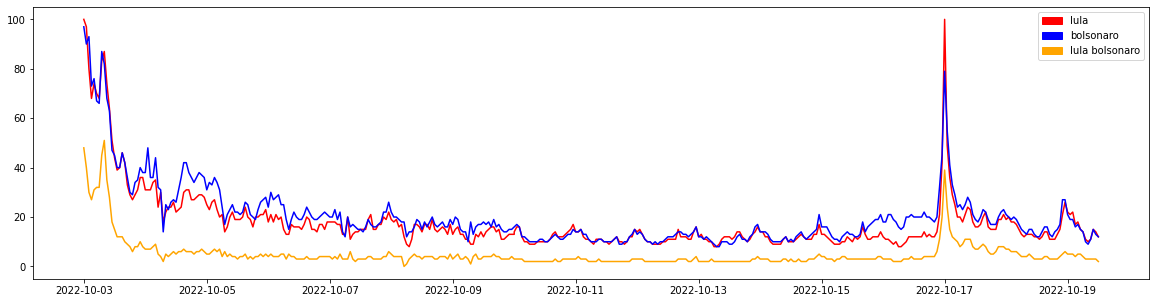

In [21]:
plotComparison(req, 3)


# Acumulado

Index(['lula', 'bolsonaro', 'lula bolsonaro'], dtype='object')


## Dados Acumulados (Escala Log)

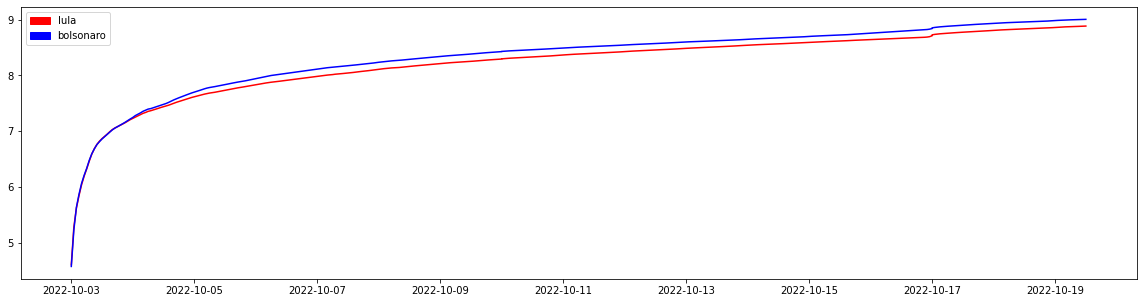

In [22]:
accum = []
idArr = []
for index,row in req.iterrows():
    idArr.append(index)
    accum.append({})
    for col in kw_list:
        accum[-1][col] = row[col] + accum[-2][col] if len(accum)>1 else row[col] 
dataFrame = DataFrame(accum,index=idArr)
print(dataFrame.columns)
for col in dataFrame.columns[0:len(kw_list)]:
    dataFrame[col] = dataFrame[col].apply(lambda x: math.log(x))
display(Markdown("## Dados Acumulados (Escala Log)"))
plotComparison(dataFrame, 2)


# Embate percentual com incerteza


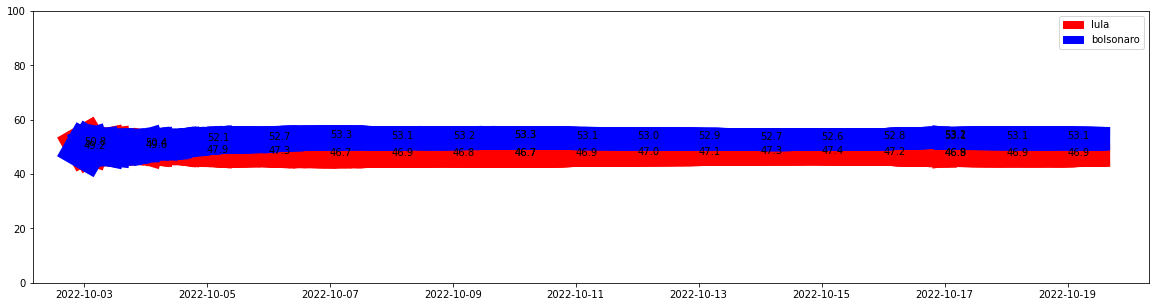

In [23]:
accumPercent = []
for x in accum:
    accumPercent.append({})
    total = (math.fsum(x[v] for v in kw_list[0:2])) 
    for col in kw_list[0:2]:
        accumPercent[-1][col] = (x[col]/total)*100
    accumPercent[-1]["Incerteza"] = x[kw_list[2]] / (x[kw_list[2]]+total) * 100
dataFrame = DataFrame(accumPercent,index=idArr)
plotComparison(dataFrame, 2, True, True , ylin=[0,100])

## Por região

In [24]:
dataByRegion = conn.interest_by_region(resolution='COUNTRY')
display(dataByRegion)

C:\Users\10086519\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


,lula,bolsonaro,lula bolsonaro
geoName,,,
Acre,41,43,16
Alagoas,42,43,15
Amapá,43,44,13
Amazonas,44,43,13
Bahia,41,42,17
Ceará,43,43,14
Distrito Federal,43,46,11
Espírito Santo,41,44,15
Goiás,41,43,16


## Principais Tópicos

In [25]:
display(conn.related_queries())

C:\Users\10086519\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\10086519\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\10086519\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warn

{'lula': {'top':                            query  value
  0                 lula bolsonaro    100
  1                      bolsonaro     99
  2               lula e bolsonaro     44
  3                    lula debate     37
  4          debate lula bolsonaro     27
  5                   desmatamento     27
  6                   governo lula     27
  7              desmatamento lula     27
  8                  lula pesquisa     23
  9        debate bolsonaro e lula     22
  10       pesquisa lula bolsonaro     18
  11             lula ou bolsonaro     17
  12     desmatamento governo lula     16
  13               lula presidente     14
  14                     lula 2022     14
  15     pesquisa bolsonaro e lula     10
  16                     lula hoje      9
  17                     lula flow      9
  18                     flow lula      9
  19   desmatamento lula bolsonaro      9
  20        desmatamento bolsonaro      8
  21    debate de lula e bolsonaro      8
  22  desmatamento 